In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers
from keras.preprocessing import image
from keras.models import Model
from classification_models.keras import Classifiers
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
train_dir ="dataset22/dataset2/train" 
test_dir = "dataset22/dataset2/test" 
IMG_SIZE = 224
EPOCHS = 20
BATCH_SIZE = 10

In [4]:
ResNet50, preprocess_input = Classifiers.get('resnet50')
resnet = ResNet50(include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3), weights='imagenet')
x = keras.layers.GlobalAveragePooling2D()(resnet.output)
output = keras.layers.Dense(2, activation='softmax')(x)
model = keras.models.Model(inputs=[resnet.input], outputs=[output])
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                              target_size=(IMG_SIZE, IMG_SIZE),
                                                              batch_size=BATCH_SIZE,
                                                              class_mode="categorical")

Found 976 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [13]:
%%time
import warnings
warnings.filterwarnings("ignore")

# Training
H = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    verbose=1)



Epoch 1/20
97/97 [==============================] - 74s 765ms/step - loss: 0.6274 - accuracy: 0.7732 - val_loss: 0.5162 - val_accuracy: 1.0000
Epoch 2/20
97/97 [==============================] - 73s 753ms/step - loss: 0.4011 - accuracy: 0.8247 - val_loss: 5.8123 - val_accuracy: 0.3542
Epoch 3/20
97/97 [==============================] - 74s 766ms/step - loss: 0.2583 - accuracy: 0.8814 - val_loss: 3.7983 - val_accuracy: 0.0000e+00
Epoch 4/20
97/97 [==============================] - 73s 755ms/step - loss: 0.1170 - accuracy: 0.9536 - val_loss: 4.5214 - val_accuracy: 0.0000e+00
Epoch 5/20
97/97 [==============================] - 74s 766ms/step - loss: 0.2182 - accuracy: 0.9227 - val_loss: 4.8717 - val_accuracy: 0.0000e+00
Epoch 6/20
97/97 [==============================] - 74s 767ms/step - loss: 0.1146 - accuracy: 0.9588 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/20
97/97 [==============================] - 73s 751ms/step - loss: 0.0198 - accuracy: 0.9948 - val_loss: 4.5860 - val_accu

In [28]:
model.save('ResNet50(1).h5')

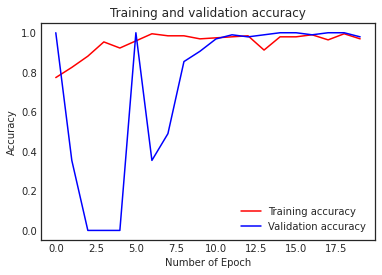

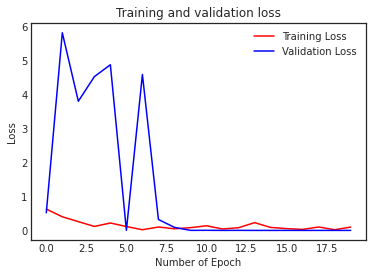

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel("Number of Epoch")
plt.ylabel("Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                              target_size=(IMG_SIZE, IMG_SIZE),
                                                              batch_size=BATCH_SIZE,
                                                              class_mode="categorical")

Found 480 images belonging to 2 classes.


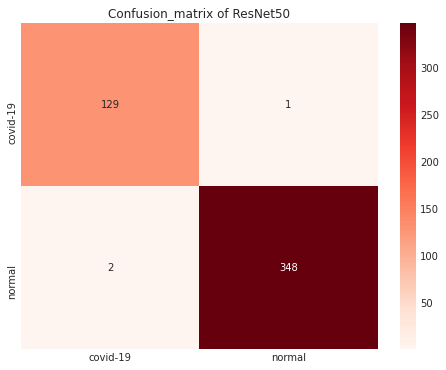

In [55]:
classes = ["covid-19","normal"]
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
matrix = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot = True, xticklabels = classes, yticklabels = classes, fmt='d',cmap = 'Reds')
plt.title('Confusion_matrix of ResNet50')
plt.show()

In [51]:
print(classification_report(validation_generator.classes, y_pred, target_names=classes))

              precision    recall  f1-score   support

    covid-19       0.98      0.99      0.99       130
      normal       1.00      0.99      1.00       350

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



In [58]:
total = sum(sum(matrix))
acc = (matrix[0, 0] + matrix[1, 1]) / total
sensitivity = matrix[0, 0] / (matrix[0, 0] + matrix[0, 1])
specificity = matrix[1, 1] / (matrix[1, 0] + matrix[1, 1])
    
print("Accuracy: {:.4f}".format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

Accuracy: 0.9938
Sensitivity: 0.9923
Specificity: 0.9943
